In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
#!/bin/bash
!kaggle datasets download shree1992/housedata

Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 548MB/s]


In [8]:
!unzip housedata.zip

Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


In [79]:
dataset = pd.read_csv('data.csv')

In [80]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Data Preprocessing

In [81]:
dataset.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [82]:
columns_to_drop = ['date', 'street', 'statezip', 'country']

In [83]:
dataset = dataset.drop(columns_to_drop, axis=1)

In [84]:
dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city'],
      dtype='object')

In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
dtypes: float64(4), int64(9), object(1)
memory usage: 503.3+ KB


In [85]:
dataset.isnull().sum()

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0
sqft_above,0


In [87]:
dataset.duplicated().sum()

np.int64(0)

## Encoding city column

In [97]:
df_encoded = pd.get_dummies(dataset, columns=['city'], drop_first=True)
df_encoded = df_encoded.astype("int")

print(df_encoded.head())

     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000         3          1         1340      7912       1           0   
1  2384000         5          2         3650      9050       2           0   
2   342000         3          2         1930     11947       1           0   
3   420000         3          2         2000      8030       1           0   
4   550000         4          2         1940     10500       1           0   

   view  condition  sqft_above  ...  city_SeaTac  city_Seattle  \
0     0          3        1340  ...            0             0   
1     4          5        3370  ...            0             1   
2     0          4        1930  ...            0             0   
3     0          4        1000  ...            0             0   
4     0          4        1140  ...            0             0   

   city_Shoreline  city_Skykomish  city_Snoqualmie  city_Snoqualmie Pass  \
0               1               0                0        

## Outliers detection

In [88]:
from scipy import stats

In [110]:
df_encoded.shape

(4600, 56)

In [100]:
df_encoded.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,1.788913,2139.346957,1.485252e+04,1.459130,0.007174,0.240652,3.451739,1827.265435,...,0.006304,0.341957,0.026739,0.000652,0.015435,0.000217,0.006304,0.006304,0.025000,0.000870
std,5.638347e+05,0.908848,0.752185,963.206916,3.588444e+04,0.552194,0.084404,0.778405,0.677230,862.168977,...,0.079158,0.474417,0.161338,0.025532,0.123288,0.014744,0.079158,0.079158,0.156142,0.029479
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.228750e+05,3.000000,1.000000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.609430e+05,3.000000,2.000000,1980.000000,7.683000e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.549625e+05,4.000000,2.000000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,9410.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
df_encoded.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'city_Auburn',
       'city_Beaux Arts Village', 'city_Bellevue', 'city_Black Diamond',
       'city_Bothell', 'city_Burien', 'city_Carnation', 'city_Clyde Hill',
       'city_Covington', 'city_Des Moines', 'city_Duvall', 'city_Enumclaw',
       'city_Fall City', 'city_Federal Way', 'city_Inglewood-Finn Hill',
       'city_Issaquah', 'city_Kenmore', 'city_Kent', 'city_Kirkland',
       'city_Lake Forest Park', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_Milton', 'city_Newcastle',
       'city_Normandy Park', 'city_North Bend', 'city_Pacific', 'city_Preston',
       'city_Ravensdale', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_SeaTac', 'city_Seattle', 'city_Shoreline', 'city_Skykomish',
       'city_Snoqualmie', 'city_Snoqualmie Pass', 'city_Tukwila',
       'city_Vashon', 'city_Woodinville', 'city_Yarr

In [149]:
df_encoded['floors'].value_counts()

,count
floors,
1,2618
2,1852
3,130


In [150]:
zscore_cols = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above', 'condition', 'sqft_basement']

# Calculate z-scores
z_scores = np.abs(stats.zscore(df_encoded[zscore_cols]))

# Threshold
threshold = 3

# Keep only non-outliers
df_no_outliers = df_encoded[(z_scores < threshold).all(axis=1)]

print("Before:", df_encoded.shape)       # (4600, 56)
print("After:", df_no_outliers.shape)    # new shape
print("Rows removed:", df_encoded.shape[0] - df_no_outliers.shape[0])

Before: (4600, 53)
After: (4388, 53)
Rows removed: 212


In [151]:
df_no_outliers.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
count,4.388000e+03,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,...,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000
mean,5.138667e+05,3.358933,1.737466,2045.959207,10696.443710,1.451686,3.459207,1755.816545,290.142662,1970.371696,...,0.006609,0.351869,0.027347,0.000684,0.014813,0.000228,0.006381,0.005242,0.023017,0.000912
std,2.864466e+05,0.861728,0.675799,799.786984,12727.408609,0.552417,0.671762,752.606873,418.837206,29.806567,...,0.081035,0.477608,0.163112,0.026141,0.120818,0.015096,0.079635,0.072217,0.149975,0.030182
min,0.000000e+00,1.000000,0.000000,370.000000,638.000000,1.000000,2.000000,370.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.197125e+05,3.000000,1.000000,1440.000000,5000.000000,1.000000,3.000000,1180.000000,0.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.520000e+05,3.000000,2.000000,1940.000000,7500.000000,1.000000,3.000000,1550.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.350000e+05,4.000000,2.000000,2540.000000,10396.250000,2.000000,4.000000,2220.000000,600.000000,1996.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.199900e+06,6.000000,4.000000,5000.000000,120661.000000,3.000000,5.000000,4410.000000,1700.000000,2014.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
df_encoded.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,1.788913,2139.346957,1.485252e+04,1.459130,3.451739,1827.265435,312.081522,1970.786304,...,0.006304,0.341957,0.026739,0.000652,0.015435,0.000217,0.006304,0.006304,0.025000,0.000870
std,5.638347e+05,0.908848,0.752185,963.206916,3.588444e+04,0.552194,0.677230,862.168977,464.137228,29.731848,...,0.079158,0.474417,0.161338,0.025532,0.123288,0.014744,0.079158,0.079158,0.156142,0.029479
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,1.000000,370.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.228750e+05,3.000000,1.000000,1460.000000,5.000750e+03,1.000000,3.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.609430e+05,3.000000,2.000000,1980.000000,7.683000e+03,1.000000,3.000000,1590.000000,0.000000,1976.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.549625e+05,4.000000,2.000000,2620.000000,1.100125e+04,2.000000,4.000000,2300.000000,610.000000,1997.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,5.000000,9410.000000,4820.000000,2014.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


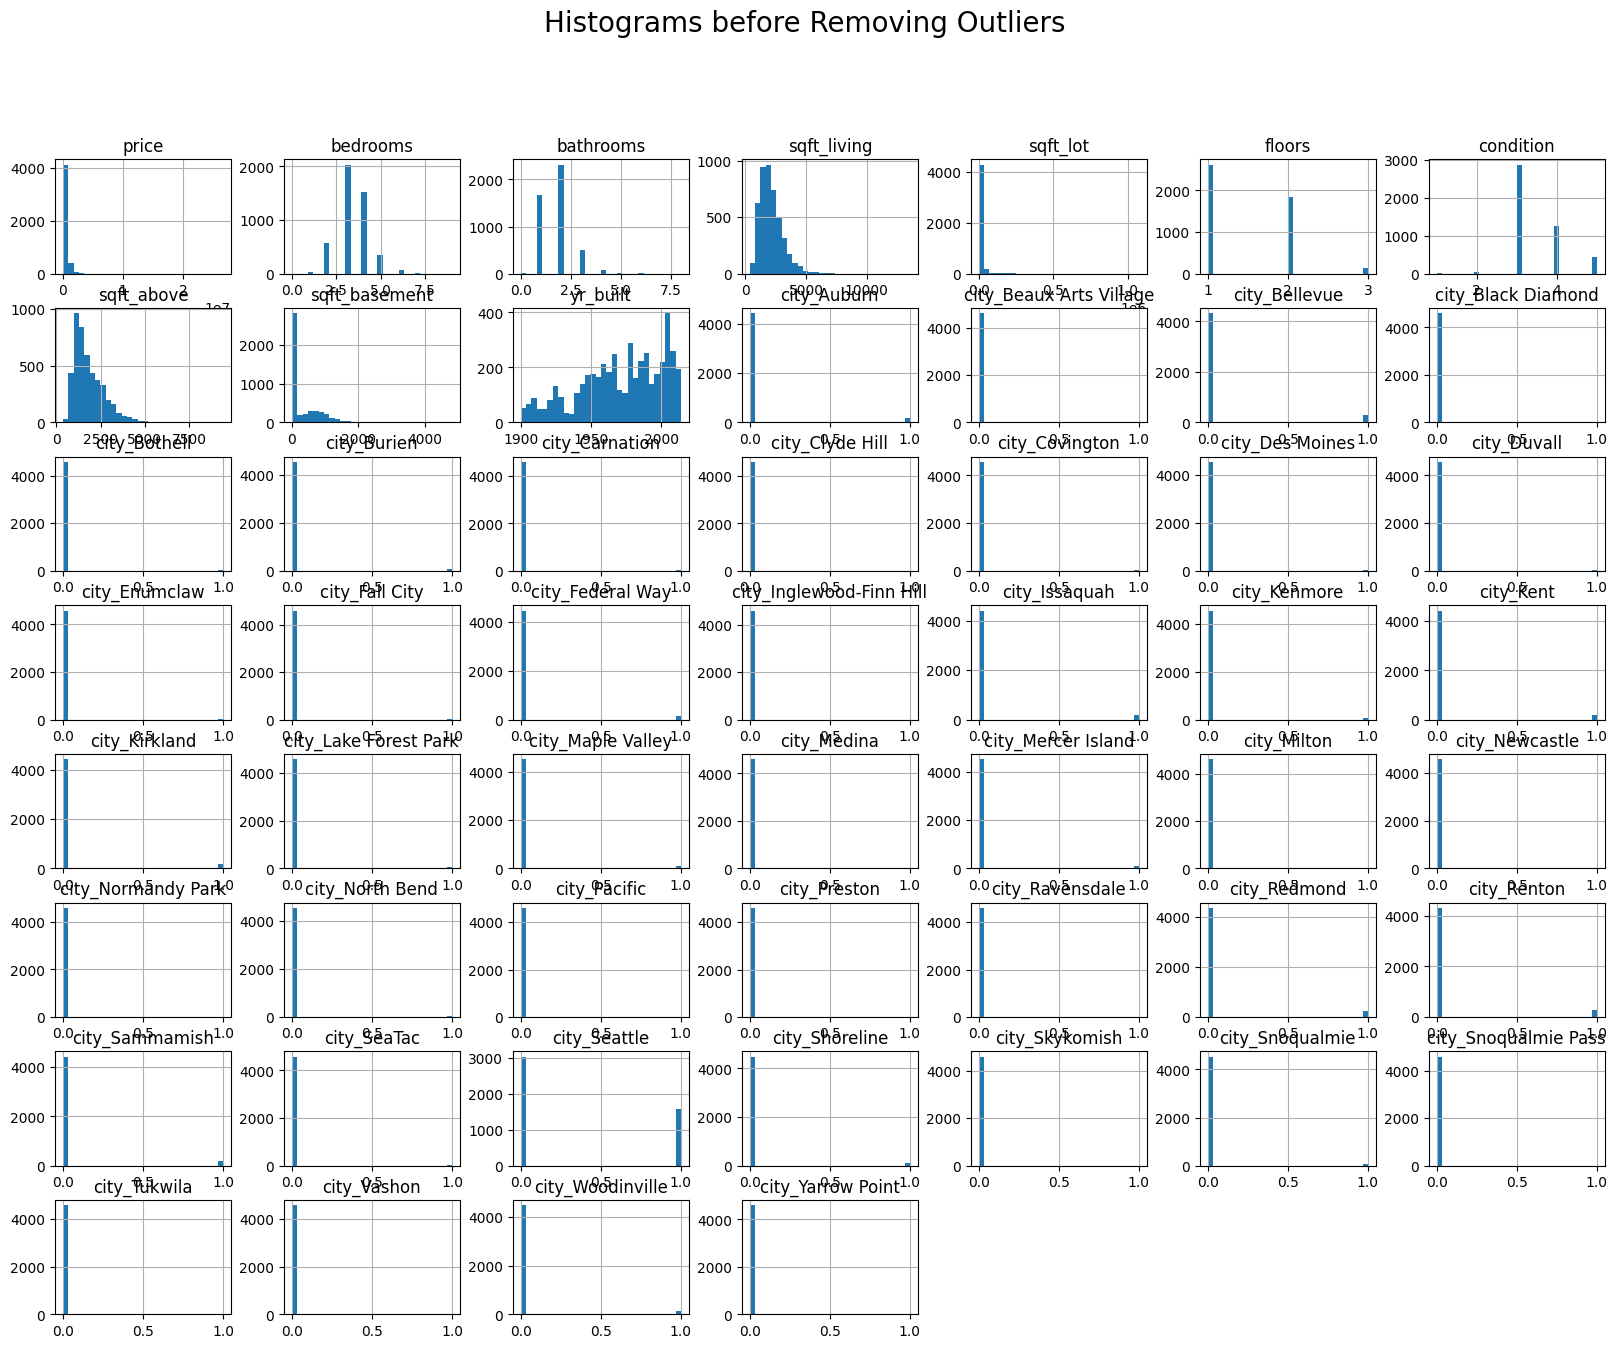

In [153]:
df_encoded.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms before Removing Outliers", fontsize=20)
plt.show()

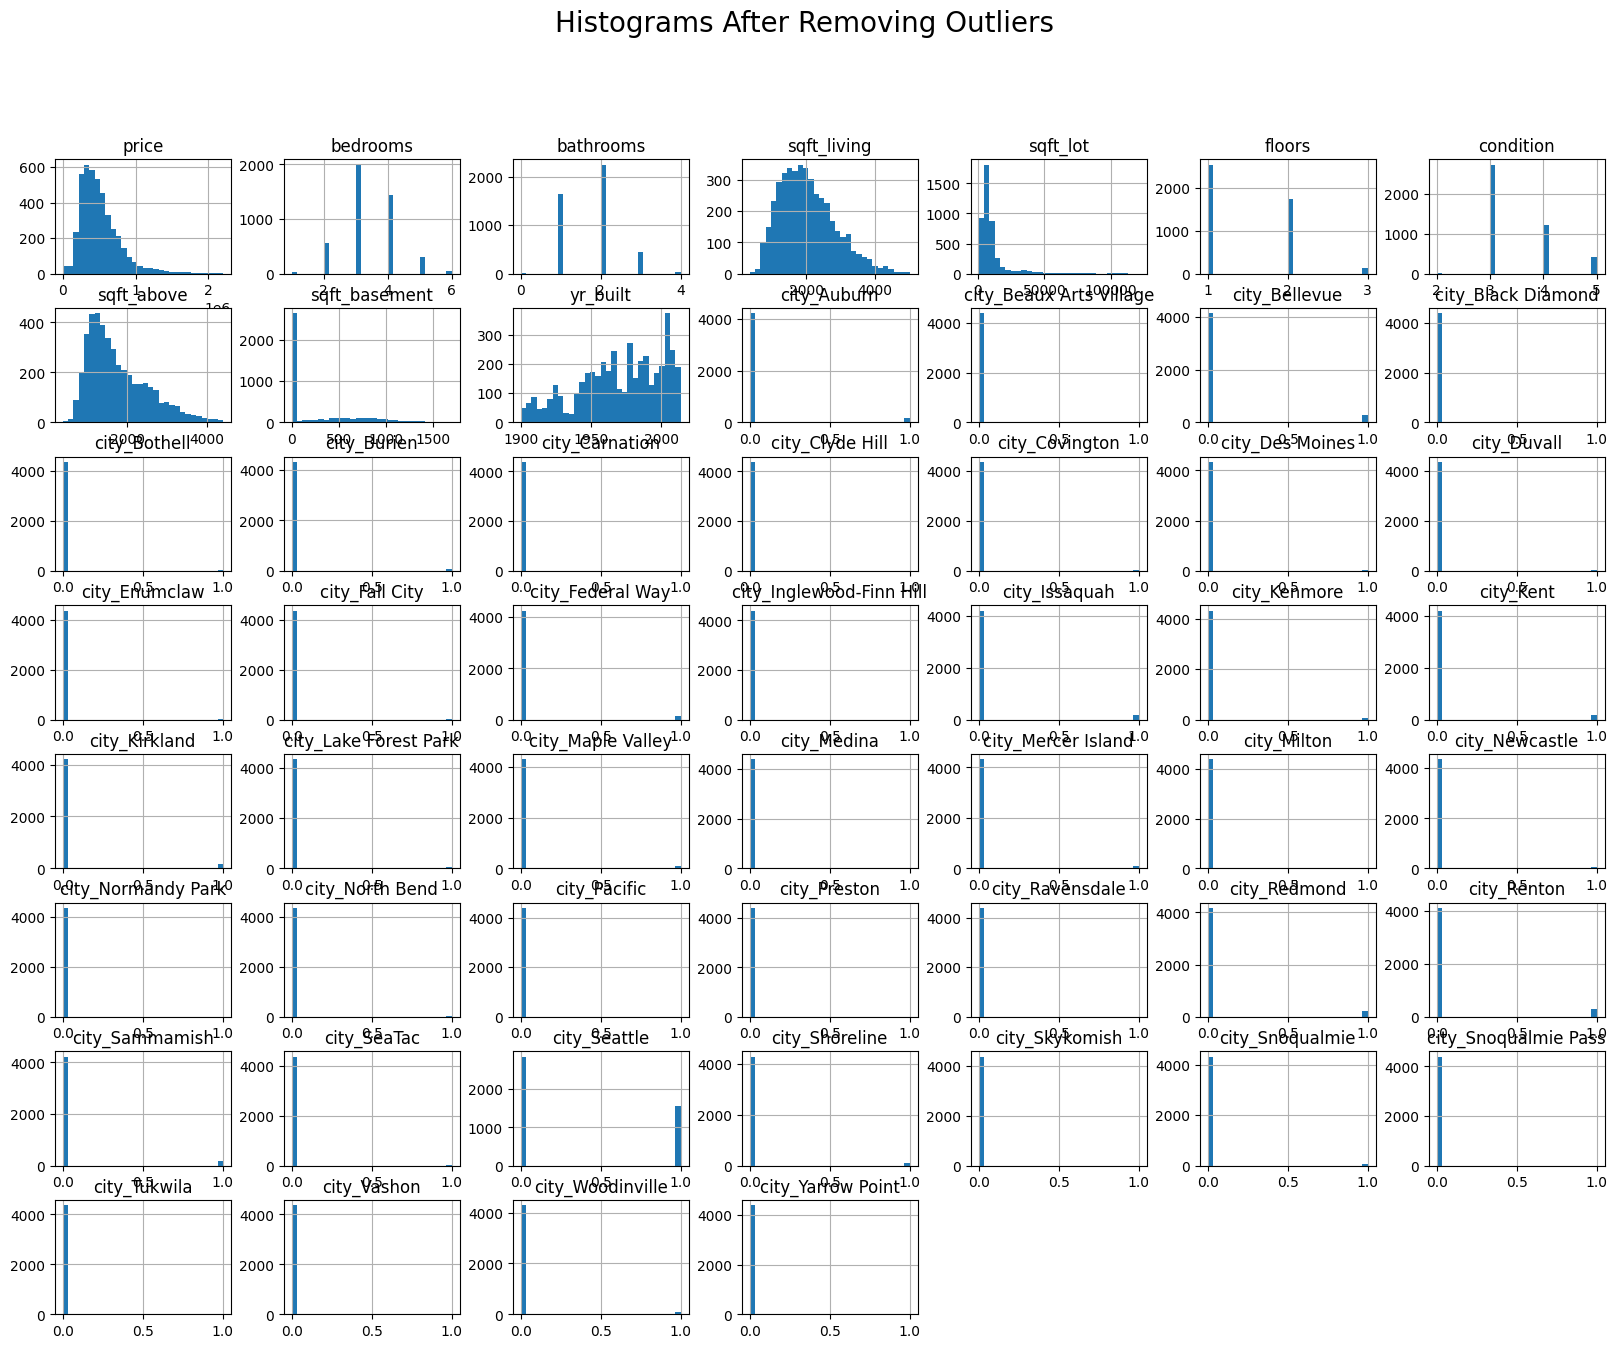

In [154]:
df_no_outliers.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms After Removing Outliers", fontsize=20)
plt.show()

In [155]:
df_no_outliers.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
count,4.388000e+03,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,...,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000
mean,5.138667e+05,3.358933,1.737466,2045.959207,10696.443710,1.451686,3.459207,1755.816545,290.142662,1970.371696,...,0.006609,0.351869,0.027347,0.000684,0.014813,0.000228,0.006381,0.005242,0.023017,0.000912
std,2.864466e+05,0.861728,0.675799,799.786984,12727.408609,0.552417,0.671762,752.606873,418.837206,29.806567,...,0.081035,0.477608,0.163112,0.026141,0.120818,0.015096,0.079635,0.072217,0.149975,0.030182
min,0.000000e+00,1.000000,0.000000,370.000000,638.000000,1.000000,2.000000,370.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.197125e+05,3.000000,1.000000,1440.000000,5000.000000,1.000000,3.000000,1180.000000,0.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.520000e+05,3.000000,2.000000,1940.000000,7500.000000,1.000000,3.000000,1550.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.350000e+05,4.000000,2.000000,2540.000000,10396.250000,2.000000,4.000000,2220.000000,600.000000,1996.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.199900e+06,6.000000,4.000000,5000.000000,120661.000000,3.000000,5.000000,4410.000000,1700.000000,2014.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting the dataset into training and testing

In [156]:
X = df_no_outliers.drop(columns=['price'])
y = df_no_outliers['price']

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Scaling the columns that need to be standardized

In [162]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['bedrooms', 'bathrooms', 'sqft_living',
                'sqft_lot', 'floors', 'condition',
                'sqft_above', 'sqft_basement', 'yr_built']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [164]:
X_train.shape

(3510, 52)

In [178]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)


In [168]:
y_train.describe()

,price
count,3510.000000
mean,12.907710
std,1.371208
min,0.000000
25%,12.661999
50%,13.021992
75%,13.369225
max,14.603923


# Training the Model

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [170]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [171]:
y_pred = lr.predict(X_test)

In [172]:
y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)

In [173]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [174]:
print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 212786.34958379096
R² Score: 0.41627471996295573


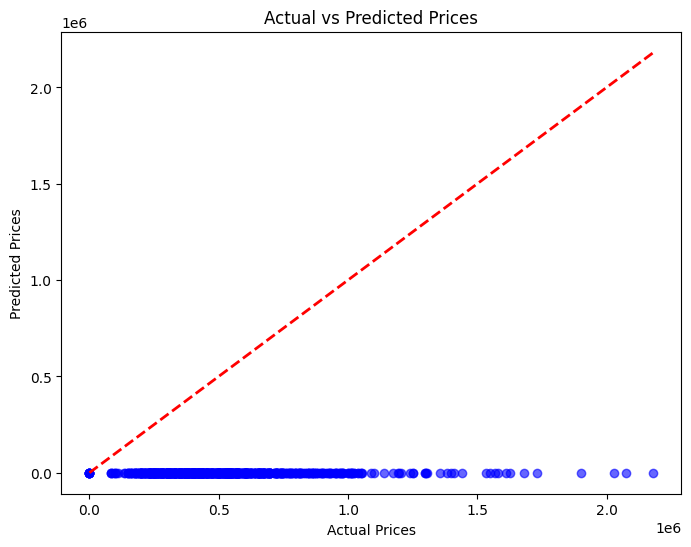

In [176]:
# Make predictions
y_pred = lr.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", linewidth=2)  # perfect prediction line

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [179]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ========== Random Forest ==========
rf = RandomForestRegressor(
    n_estimators=200,    # number of trees
    max_depth=None,      # let it grow fully (you can tune)
    random_state=42,
    n_jobs=-1            # use all CPU cores
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("RMSE:", rmse_rf)
print("R²:", r2_rf)

Random Forest Results:
RMSE: 10.367691011590349
R²: -53.69045535354433


In [180]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# X = features, y = target (price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale only features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 174431.05410656214
R²: 0.60774491306127
